### 로지스틱 회귀로 와인 분류하기

In [27]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [28]:
wine = pd.read_csv('../Data/wine.csv')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [29]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [30]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [31]:
wine.shape

(6497, 4)

In [32]:
# Feature, Target
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [33]:
# Train, Test
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,target,test_size=0.2,random_state=42)

In [34]:
print("Train:",train_input.shape)
print("Test:",test_input.shape)

Train: (5197, 3)
Test: (1300, 3)


In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [36]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print("Train:",lr.score(train_scaled,train_target))
print("Test:",lr.score(test_scaled,test_target))

Train: 0.7808350971714451
Test: 0.7776923076923077


In [37]:
# 가중치와 편차 구하기
print(lr.coef_,lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


---
### 결정 트리
- 선형회귀나 KNN처럼 전처리 과정이 필요없다.

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled,train_target)
print('Train:', dt.score(train_scaled,train_target))
print('Test:', dt.score(test_scaled,test_target))

Train: 0.996921300750433
Test: 0.8630769230769231


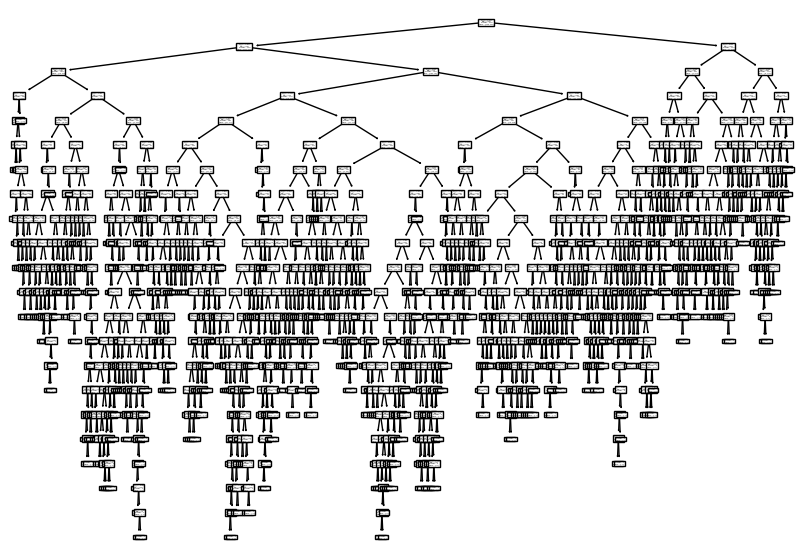

In [39]:
# 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

> 맨 위의 단계를 root node라고 하고 맨 마지막 단계는 leaf node라고 한다.    
> 시간이 많이 걸리고 단계가 너무 복잡하다.

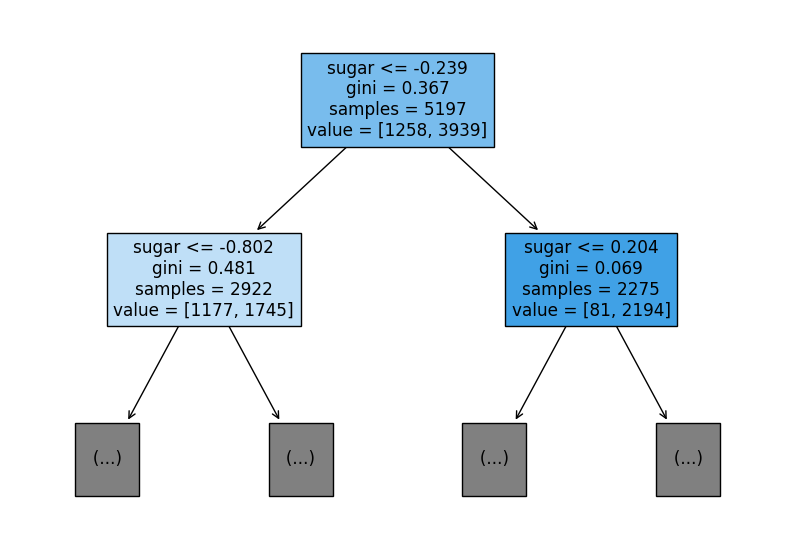

In [40]:
# decision tree의 단계(depth)를 단순하게 하자
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

### 가지치기 (Tree Pruning)
- max_depth의 parameter의 값을 조절한다.
- decision tree의 과대적합을 막는다.

In [41]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)
print('Train:', dt.score(train_input,train_target))
print('Test:', dt.score(test_input,test_target))

Train: 0.8454877814123533
Test: 0.8415384615384616


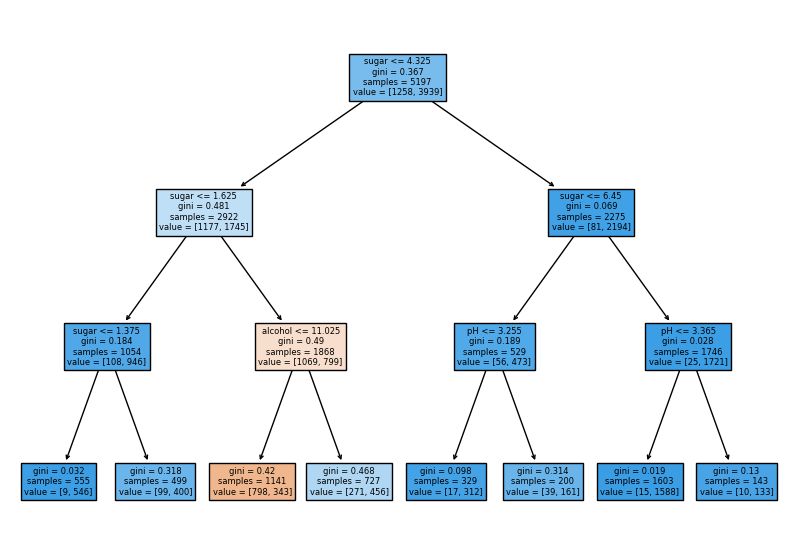

In [42]:
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [43]:
# 특성 중요도
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

### 최적화시키기

In [44]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005,random_state=42) # 불순도 0.0005까지 찾아라
dt.fit(train_input,train_target)
print('Train:', dt.score(train_input,train_target))
print('Test:', dt.score(test_input,test_target))

Train: 0.8874350586877044
Test: 0.8615384615384616


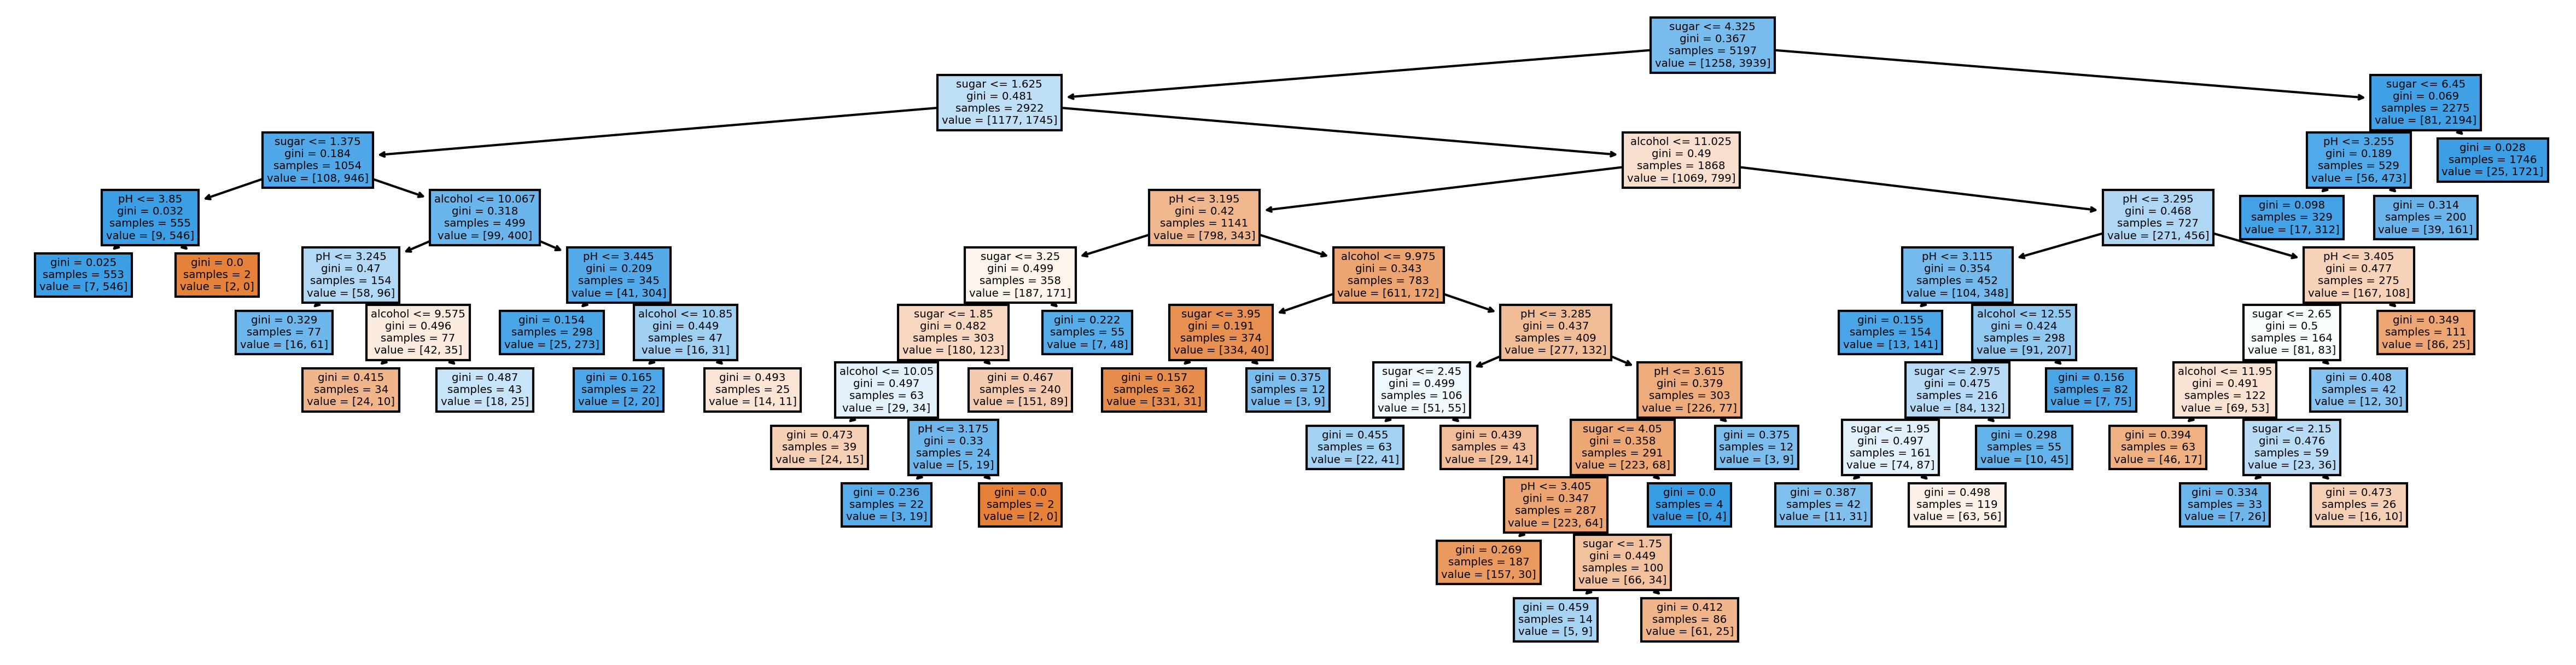

In [45]:
plt.figure(figsize=(20,5),dpi=300)
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.savefig('../Data/wine.jpg')
plt.show()